In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [34]:
df = pd.read_csv('titanic_train.csv',na_values=".")


In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.drop(['Name'],axis = 1,inplace = True)

In [37]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [38]:
df.drop(['Ticket'],axis = 1,inplace = True)

In [39]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [40]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [41]:
df.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
A34            1
B79            1
E68            1
D50            1
C91            1
Name: Cabin, Length: 147, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
list1 = ['Sex','Cabin','Embarked']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [44]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,147,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,147,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,147,2
887,888,1,1,0,19.0,0,0,30.0000,30,2
888,889,0,3,0,NaN,1,2,23.4500,147,2
889,890,1,1,1,26.0,0,0,30.0000,60,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null int32
Embarked       891 non-null int32
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


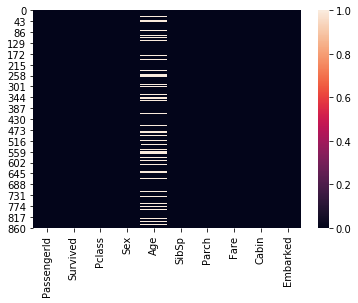

In [46]:
sns.heatmap(df.isnull())

In [51]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [52]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,147,2
1,2,1,1,0,38.000000,1,0,71.2833,81,0
2,3,1,3,0,26.000000,0,0,7.9250,147,2
3,4,1,1,0,35.000000,1,0,53.1000,55,2
4,5,0,3,1,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,147,2
887,888,1,1,0,19.000000,0,0,30.0000,30,2
888,889,0,3,0,29.699118,1,2,23.4500,147,2
889,890,1,1,1,26.000000,0,0,30.0000,60,0


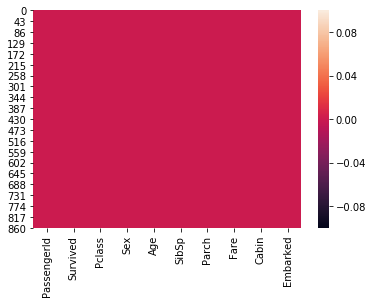

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [55]:
dfcor = df.corr()
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.684121,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.096681,0.104057
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.235406,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.028324,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.503355,-0.221226
Cabin,-0.035077,-0.254888,0.684121,0.096681,-0.235406,0.043593,-0.028324,-0.503355,1.000000,0.193205
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,0.193205,1.000000


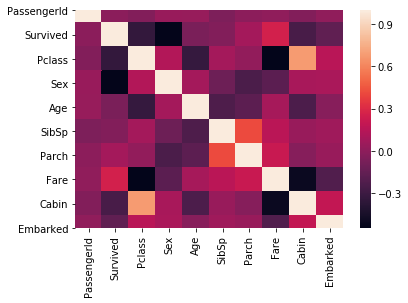

In [58]:
sns.heatmap(dfcor)

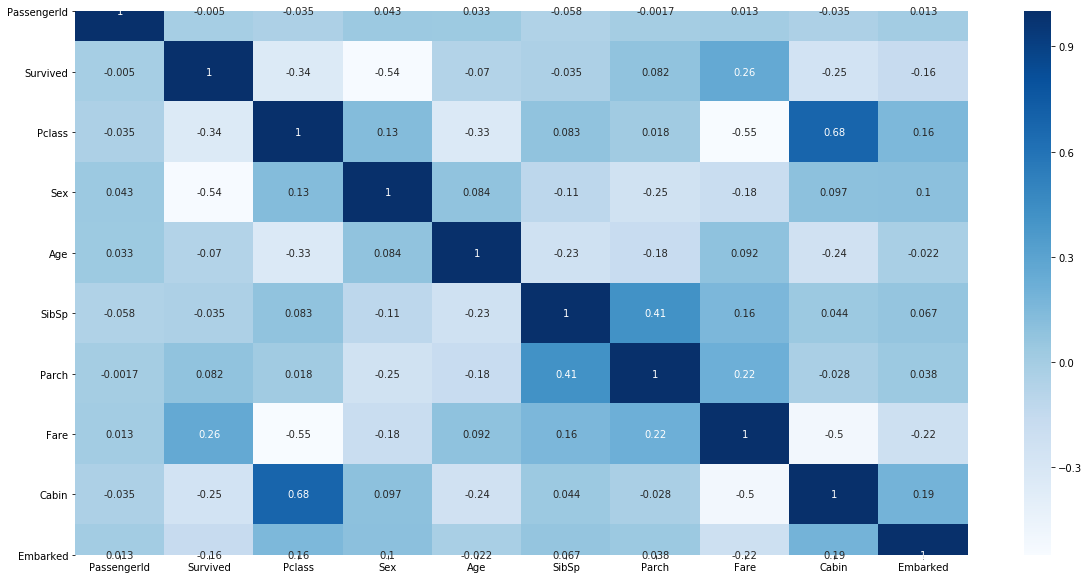

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

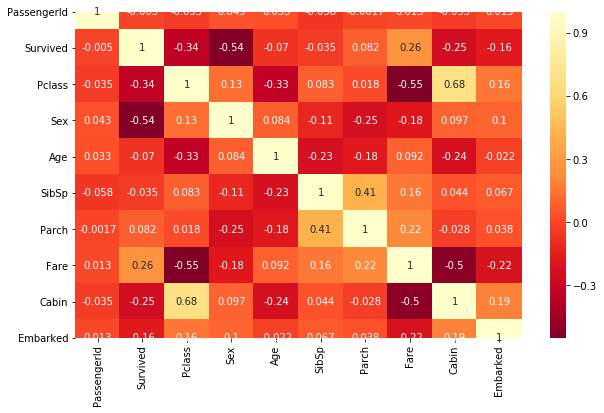

In [60]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

In [61]:
df.drop(['Sex'],axis = 1,inplace = True)

In [62]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,22.000000,1,0,7.2500,147,2
1,2,1,1,38.000000,1,0,71.2833,81,0
2,3,1,3,26.000000,0,0,7.9250,147,2
3,4,1,1,35.000000,1,0,53.1000,55,2
4,5,0,3,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,147,2
887,888,1,1,19.000000,0,0,30.0000,30,2
888,889,0,3,29.699118,1,2,23.4500,147,2
889,890,1,1,26.000000,0,0,30.0000,60,0


In [63]:
collist=df.columns.values
ncol=15
nrows=15

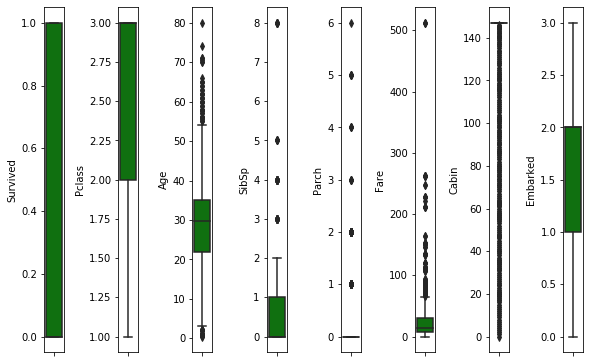

In [64]:
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

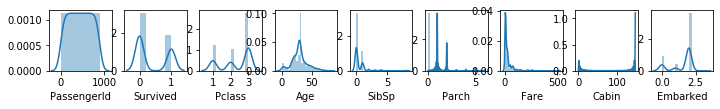

In [65]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [66]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.50244517, 0.45150219,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.78684529, 1.38162664,
        1.93846038],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.48885426, 0.45150219,
        0.58111394],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.17626324, 0.45150219,
        0.58111394],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.04438104, 1.9648949 ,
        1.93846038],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.49237783, 0.45150219,
        0.67867322]])

In [67]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  23,  25,  27,  50,  59,  61,  68,  71,  86,  88,  96,
        96, 116, 118, 119, 159, 164, 167, 170, 171, 174, 180, 182, 185,
       201, 209, 233, 258, 261, 266, 278, 284, 299, 311, 324, 329, 341,
       360, 377, 380, 386, 437, 438, 438, 445, 475, 480, 493, 523, 527,
       540, 541, 542, 556, 557, 567, 583, 599, 610, 630, 630, 638, 647,
       672, 678, 679, 683, 686, 689, 690, 700, 716, 730, 736, 737, 737,
       742, 745, 745, 774, 779, 779, 781, 787, 792, 806, 813, 815, 824,
       829, 846, 850, 851, 858, 863, 867, 885], dtype=int64), array([5, 4, 7, 5, 6, 4, 4, 7, 4, 4, 5, 6, 3, 7, 3, 6, 4, 4, 4, 5, 7, 4,
       7, 4, 4, 7, 4, 7, 4, 6, 4, 4, 4, 7, 6, 6, 4, 7, 6, 5, 6, 6, 4, 5,
       5, 6, 7, 7, 4, 3, 7, 6, 7, 4, 4, 7, 6, 5, 7, 7, 5, 3, 7, 5, 7, 3,
       5, 6, 4, 4, 6, 7, 6, 6, 6, 5, 6, 7, 6, 3, 7, 5, 6, 7, 7, 4, 4, 7,
       4, 7, 4, 7, 4, 4, 3, 5, 4, 7, 5], dtype=int64))


In [68]:
df_new=df[((z<3).all(axis=1))]

In [69]:
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,22.000000,1,0,7.2500,147,2
1,2,1,1,38.000000,1,0,71.2833,81,0
2,3,1,3,26.000000,0,0,7.9250,147,2
3,4,1,1,35.000000,1,0,53.1000,55,2
4,5,0,3,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,147,2
887,888,1,1,19.000000,0,0,30.0000,30,2
888,889,0,3,29.699118,1,2,23.4500,147,2
889,890,1,1,26.000000,0,0,30.0000,60,0


In [71]:
df.shape

(891, 9)

In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [73]:
df_x=df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]

In [74]:
df_x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


In [75]:
df_y = df[['Survived']]

In [76]:
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [77]:
x=df_x

In [78]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


In [79]:
y = df_y

In [80]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [81]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [82]:
x = scale.fit_transform(x)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [84]:
x_train.shape

(596, 6)

In [85]:
y_train.shape

(596, 1)

In [86]:
x_test.shape

(295, 6)

In [87]:
y_test.shape

(295, 1)

In [88]:
lg = LogisticRegression()

In [89]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
accuracy_score: 0.7186440677966102
[[155  20]
 [ 63  57]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       175
           1       0.74      0.47      0.58       120

    accuracy                           0.72       295
   macro avg       0.73      0.68      0.68       295
weighted avg       0.72      0.72      0.70       295



In [91]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6949152542372882
[[149  26]
 [ 64  56]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       175
           1       0.68      0.47      0.55       120

    accuracy                           0.69       295
   macro avg       0.69      0.66      0.66       295
weighted avg       0.69      0.69      0.68       295



In [92]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.7491525423728813
[[162  13]
 [ 61  59]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       175
           1       0.82      0.49      0.61       120

    accuracy                           0.75       295
   macro avg       0.77      0.71      0.71       295
weighted avg       0.76      0.75      0.73       295



In [93]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.7084745762711865
[[144  31]
 [ 55  65]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       175
           1       0.68      0.54      0.60       120

    accuracy                           0.71       295
   macro avg       0.70      0.68      0.69       295
weighted avg       0.70      0.71      0.70       295



In [94]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.6711864406779661
[[138  37]
 [ 60  60]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       175
           1       0.62      0.50      0.55       120

    accuracy                           0.67       295
   macro avg       0.66      0.64      0.65       295
weighted avg       0.67      0.67      0.66       295

